### Packages

In [8]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import random
import matplotlib.image as mpimg
import zipfile
import shutil

### Importing Data

In [126]:
def ListIndex(path):
    listFile = os.listdir(path)
    listFileSplit = []
    listFinal = []
    for x in listFile:
        listFileSplit.append(x.split("."))
    for x in listFileSplit:
        listFinal.append(x[0])
    return listFinal

In [5]:
def MoveData(path):
    categories=["architecture","human","landscape"]
    qual=["HighQuality","LowQuality"]
    for j in qual:
        for i in categories:
            listFile = os.listdir(path+'/'+j+'/'+i)
            for x in listFile:
                if j == "HighQuality":
                    x = x.split(".")[0]+"."+i+'.'+str(1)+'.jpg'
                else:
                    x = x.split(".")[0]+"."+i+'.'+str(0)+'.jpg'
                shutil.move(path+'/'+j+'/'+i+'/'+x.split(".")[0]+'.jpg', "./data/photo/"+x)

In [4]:
# categories=["architecture","human","landscape"]
# def GetData(path,labelvalue):
#     index=[]
#     cat=[]
#     label=[]
#     for i in categories:
#         index=index+(ListIndex(path+'/'+i))
#         cat=cat+([i]*np.shape(ListIndex(path+'/'+i))[0])
#     return pd.DataFrame({'index':index,'Categorie':cat, 'Label':labelvalue})

In [5]:
zipfile.ZipFile('./data/PhotoQualityDataset.zip', 'r').extractall('./data')

In [42]:
MoveData('./data/PhotoQualityDataset')

NameError: name 'MoveData' is not defined

In [43]:
filenames = os.listdir("./data/photo")
labels = []
categories = []
for filename in filenames:
    label = filename.split('.')[2]
    if label == '1':
        labels.append(1)
    else:
        labels.append(0)  
    

df = pd.DataFrame({
    'filename': filenames,
    'label': labels
})

In [8]:
df.head()

,filename,label
0,24329.human.0.jpg,0
1,499051.landscape.1.jpg,1
2,227851.human.1.jpg,1
3,77663.human.0.jpg,0
4,6402.human.0.jpg,0


In [6]:
# hqdf = GetData('./data/PhotoQualityDataset/HighQuality',1)
# lqdf = GetData('./data/PhotoQualityDataset/LowQuality',0)
# df = pd.concat([hqdf,lqdf]) #index type = str
# df = df.reset_index()
# df.head()

,level_0,index,Categorie,Label
0,0,339094,architecture,1
1,1,638126,architecture,1
2,2,13777,architecture,1
3,3,638166,architecture,1
4,4,339687,architecture,1


### Exploring data

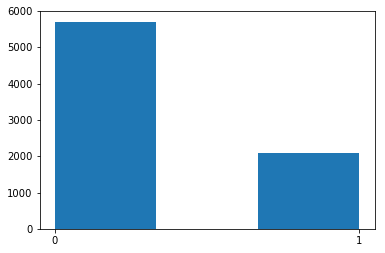

In [9]:
plt.hist(df['label'],bins=3)
plt.xticks([0,1])
plt.show()

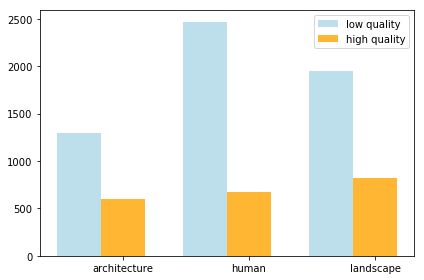

In [8]:
# data to plot
n_groups = 3
low = lqdf.groupby('Categorie').count()["Label"].values
high = hqdf.groupby('Categorie').count()["Label"].values
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, low, bar_width,
alpha=opacity,
color='lightblue',
label='low quality')
 
rects2 = plt.bar(index + bar_width, high, bar_width,
alpha=opacity,
color='orange',
label='high quality')
 
plt.xticks(index + bar_width, categories)
plt.legend()
 
plt.tight_layout()
plt.show()

In [9]:
def SampleImg(path,n):
    listFile = os.listdir(path)
    selectedimg=np.random.choice(listFile,n)
    for i in range(n):
        img = mpimg.imread(path+'/'+selectedimg[i])
        fig=plt.imshow(img)
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
        plt.show()

#### Exemple paysage de bonne qualité

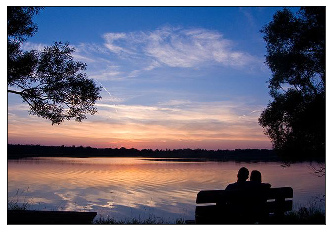

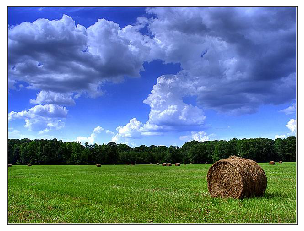

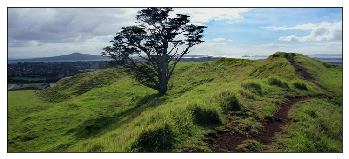

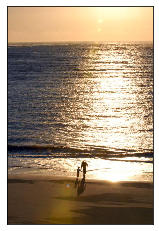

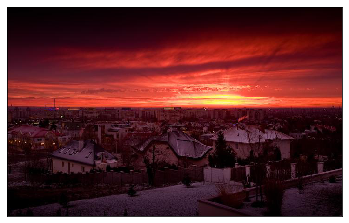

In [114]:
SampleImg("./data/PhotoQualityDataset/HighQuality/landscape",5)

#### Exemple Paysage de Mauvaise Qualités

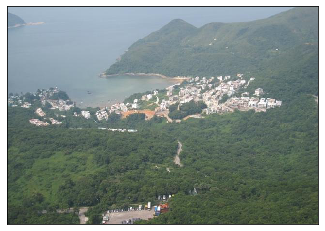

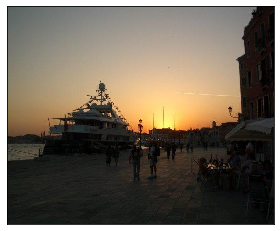

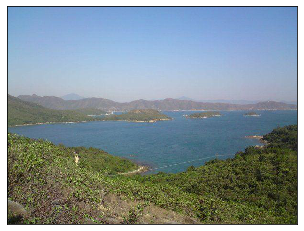

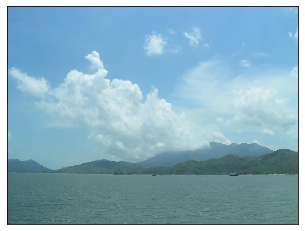

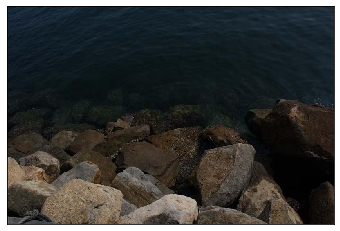

In [115]:
SampleImg("./data/PhotoQualityDataset/LowQuality/landscape",5)

## Creating model

In [45]:
from keras import backend as K
from keras.datasets import mnist
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from keras.layers import Dense, Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

from keras.models import Sequential
import pandas as pd

from sklearn.model_selection import train_test_split

In [11]:
model = Sequential()
K.set_image_data_format('channels_last')
np.random.seed(0)

In [12]:
df.head()

,filename,label
0,24329.human.0.jpg,0
1,499051.landscape.1.jpg,1
2,227851.human.1.jpg,1
3,77663.human.0.jpg,0
4,6402.human.0.jpg,0


In [13]:
# img=[]
# for i in range(0,len(df)):
#     if df["Label"][i] == 1:
#         img.append(img_to_array(load_img('./data/PhotoQualityDataset/HighQuality/'+df['Categorie'][i]+'/'+df['index'][i]+'.jpg')))
#     if df["Label"][i] == 0:
#         img.append(img_to_array(load_img('./data/PhotoQualityDataset/LowQuality/'+df['Categorie'][i]+'/'+df['index'][i]+'.jpg')))

In [14]:
# df['img']=img

In [15]:
# y = df["Label"]
# X = df['img']

# X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2 , random_state=42)

In [86]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
train_df['label'] = [str(x) for x in train_df['label']]
validate_df = validate_df.reset_index(drop=True)
validate_df['label'] = [str(x) for x in validate_df['label']]

In [17]:
# X_train = X_train.reshape((1,) + X_train.shape)
# X_test = X_test.reshape((1,) + X_test.shape)

In [18]:
from keras.layers import Dropout

model.add(Conv2D(40, kernel_size=5, padding="same",input_shape=(300, 300, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(70, kernel_size=3, padding="same", activation = 'relu'))
model.add(Conv2D(500, kernel_size=3, padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(1024, kernel_size=3, padding="valid", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

Instructions for updating:
Colocations handled automatically by placer.


In [19]:
from keras.layers.core import Activation

model.add(Flatten())
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.1))
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.1))
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.3))

model.add(Dense(1))
model.add(Activation("softmax"))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## Training Generator

In [20]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "./data/photo/", 
    x_col='filename',
    y_col='label',
    target_size=(300,300),
    class_mode='binary',
    batch_size=25
)

Found 6242 images belonging to 2 classes.


In [21]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./data/photo/", 
    x_col='filename',
    y_col='label',
    target_size=(300,300),
    class_mode='binary',
    batch_size=25
)

Found 1561 images belonging to 2 classes.


In [22]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

In [23]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [ ]:
epochs=3 
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//25,
    steps_per_epoch=total_train//25,
    use_multiprocessing=True,
    callbacks=callbacks
)

Epoch 1/3
 28/249 [==>...........................] - ETA: 2:09:50 - loss: 11.6607 - acc: 0.2686

In [31]:
model.save_weights('first_try.h5')

RuntimeError: Problems closing file (file write failed: time = Tue Apr  2 07:10:42 2019
, filename = 'first_try.h5', file descriptor = 50, errno = 28, error message = 'No space left on device', buf = 0x564d3e2c7c00, total write size = 2048, bytes this sub-write = 2048, bytes actually written = 18446744073709551615, offset = 4096)

In [37]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    validate_df, 
    "./data/photo/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(300,300),
    batch_size=25,
    shuffle=False
)

Found 1561 images.


In [42]:
predict = model.predict_generator(test_generator, steps=np.ceil(1561/25))

In [43]:
threshold = 0.5
validate_df['probability'] = predict
validate_df['category'] = np.where(validate_df['probability'] > threshold, 1,0)

In [44]:
validate_df.head()

,filename,label,probability,category
0,60601.architecture.0.jpg,0,1.0,1
1,30199.architecture.0.jpg,0,1.0,1
2,11995.architecture.0.jpg,0,1.0,1
3,78168.human.0.jpg,0,1.0,1
4,53171.human.0.jpg,0,1.0,1


In [48]:
from sklearn.metrics import accuracy_score
accuracy_score([int(x) for x in validate_df['label']], validate_df['category'])

0.2600896860986547

## CNN MobileNET with ImageNET weights

In [2]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam

Using TensorFlow backend.


In [3]:
mobile = keras.applications.mobilenet.MobileNet()
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
17227776/17225924 [==============================] - 1s 0us/step


[[('n03877845', 'palace', 0.7450399),
  ('n02980441', 'castle', 0.05298738),
  ('n03788195', 'mosque', 0.039335966),
  ('n04311004', 'steel_arch_bridge', 0.03583938),
  ('n02825657', 'bell_cote', 0.035315286)]]

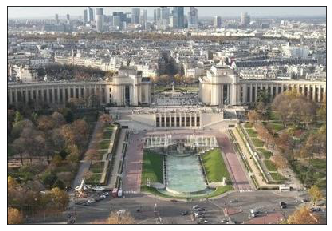

In [13]:
img = mpimg.imread('./data/photo/60601.architecture.0.jpg')
fig=plt.imshow(img)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

preprocessed_image = prepare_image('./data/photo/60601.architecture.0.jpg')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n03933933', 'pier', 0.61796135),
  ('n04366367', 'suspension_bridge', 0.33489594),
  ('n04311004', 'steel_arch_bridge', 0.045535613),
  ('n03344393', 'fireboat', 0.00055271294),
  ('n03126707', 'crane', 0.00038318767)]]

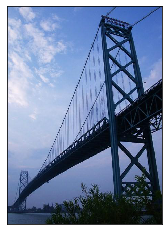

In [26]:
filename = '798049.architecture.1.jpg'

img = mpimg.imread("./data/photo/"+filename)
fig = plt.imshow(img)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

preprocessed_image = prepare_image("./data/photo/"+filename)
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n09428293', 'seashore', 0.3609063),
  ('n09472597', 'volcano', 0.09288883),
  ('n02793495', 'barn', 0.0870884),
  ('n09246464', 'cliff', 0.038885154),
  ('n11879895', 'rapeseed', 0.037145756)]]

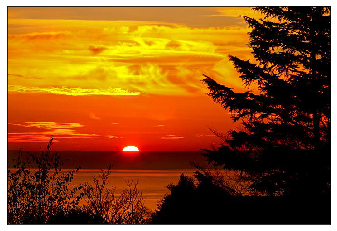

In [36]:
filename = '745065.landscape.1.jpg'

img = mpimg.imread("./data/photo/"+filename)
fig = plt.imshow(img)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

preprocessed_image = prepare_image("./data/photo/"+filename)
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

In [37]:
from keras.applications import MobileNet

base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation

/opt/conda/lib/python3.7/site-packages/keras_applications/mobilenet.py:208: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


17227776/17225924 [==============================] - 1s 0us/step


In [38]:
model=Model(inputs=base_model.input,outputs=preds)

In [39]:
for i,layer in enumerate(model.layers):
    print(i,layer.name)

0 input_2
1 conv1_pad
2 conv1
3 conv1_bn
4 conv1_relu
5 conv_dw_1
6 conv_dw_1_bn
7 conv_dw_1_relu
8 conv_pw_1
9 conv_pw_1_bn
10 conv_pw_1_relu
11 conv_pad_2
12 conv_dw_2
13 conv_dw_2_bn
14 conv_dw_2_relu
15 conv_pw_2
16 conv_pw_2_bn
17 conv_pw_2_relu
18 conv_dw_3
19 conv_dw_3_bn
20 conv_dw_3_relu
21 conv_pw_3
22 conv_pw_3_bn
23 conv_pw_3_relu
24 conv_pad_4
25 conv_dw_4
26 conv_dw_4_bn
27 conv_dw_4_relu
28 conv_pw_4
29 conv_pw_4_bn
30 conv_pw_4_relu
31 conv_dw_5
32 conv_dw_5_bn
33 conv_dw_5_relu
34 conv_pw_5
35 conv_pw_5_bn
36 conv_pw_5_relu
37 conv_pad_6
38 conv_dw_6
39 conv_dw_6_bn
40 conv_dw_6_relu
41 conv_pw_6
42 conv_pw_6_bn
43 conv_pw_6_relu
44 conv_dw_7
45 conv_dw_7_bn
46 conv_dw_7_relu
47 conv_pw_7
48 conv_pw_7_bn
49 conv_pw_7_relu
50 conv_dw_8
51 conv_dw_8_bn
52 conv_dw_8_relu
53 conv_pw_8
54 conv_pw_8_bn
55 conv_pw_8_relu
56 conv_dw_9
57 conv_dw_9_bn
58 conv_dw_9_relu
59 conv_pw_9
60 conv_pw_9_bn
61 conv_pw_9_relu
62 conv_dw_10
63 conv_dw_10_bn
64 conv_dw_10_relu
65 conv_pw_10

In [40]:
layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [49]:

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_dataframe(
                                                train_df, 
                                                "./data/photo/", 
                                                 x_col='filename',
                                                 y_col='label',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 6242 images belonging to 2 classes.


In [50]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=1)

Epoch 1/1
195/195 [==============================] - 483s 2s/step - loss: 0.2175 - acc: 0.9175


In [53]:
model.save_weights('imagenet.h5')

In [59]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    validate_df, 
    "./data/photo/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(224,224),
    batch_size=32,
    shuffle=False
)

Found 1561 images.


In [60]:
predict = model.predict_generator(test_generator, steps=np.ceil(1561/32))
threshold = 0.5

In [79]:
validate_df['category'] = np.argmax(predict)
validate_df.head()

,filename,label,probability,category
0,60601.architecture.0.jpg,0,2,2
1,30199.architecture.0.jpg,0,2,2
2,11995.architecture.0.jpg,0,2,2
3,78168.human.0.jpg,0,2,2
4,53171.human.0.jpg,0,2,2


In [77]:
validate_df.head()

,filename,label,probability,category
0,60601.architecture.0.jpg,0,2,2
1,30199.architecture.0.jpg,0,2,2
2,11995.architecture.0.jpg,0,2,2
3,78168.human.0.jpg,0,2,2
4,53171.human.0.jpg,0,2,2


In [68]:
validate_df['filename'][10]

'547793.landscape.1.jpg'

In [65]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

In [66]:
img_path = './data/photo/60601.architecture.0.jpg'
new_image = load_image(img_path)

pred = model.predict(new_image)

pred

array([[9.9995148e-01, 4.8472688e-05]], dtype=float32)

In [69]:
img_path = './data/photo/547793.landscape.1.jpg'
new_image = load_image(img_path)

pred = model.predict(new_image)

pred

array([[0.3351317 , 0.66486824]], dtype=float32)

In [91]:
filename = '227597.human.1.jpg'
print(filename)
img_path = './data/photo/'+filename
new_image = load_image(img_path)

pred = model.predict(new_image)

np.argmax(pred)

227597.human.1.jpg


1

In [95]:
prediction = []
for i in range(0,len(validate_df)):
    filename = validate_df['filename'][i]
    img_path = './data/photo/'+filename
    new_image = load_image(img_path)
    pred = model.predict(new_image)
    prediction.append(np.argmax(pred))
validate_df["pred"] = prediction

In [96]:
validate_df

,filename,label,pred
0,60601.architecture.0.jpg,0,0
1,30199.architecture.0.jpg,0,0
2,11995.architecture.0.jpg,0,0
3,78168.human.0.jpg,0,0
4,53171.human.0.jpg,0,0
5,71324.landscape.0.jpg,0,0
6,694112.landscape.1.jpg,1,0
7,10525.architecture.0.jpg,0,0
8,22456.human.0.jpg,0,0
9,48652.landscape.0.jpg,0,0


In [97]:
from sklearn.metrics import accuracy_score
accuracy_score([int(x) for x in validate_df['label']], validate_df['pred'])

0.860345932094811

Prediction :  1


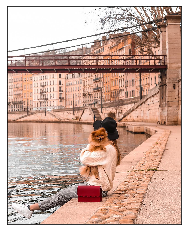

In [111]:
filename = '123.jpg'
img_path = './data/'+filename

img = mpimg.imread("./data/"+filename)
fig = plt.imshow(img)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)


new_image = load_image(img_path)
pred = model.predict(new_image)
print('Prediction : ',np.argmax(pred))

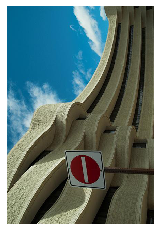

In [205]:
from IPython.display import HTML
import matplotlib.animation as animation
fig = plt.figure()
ims=[]

files = np.random.choice(validate_df['filename'][validate_df['pred']==1],10)

for i in range(10):
        img = mpimg.imread('./data/photo/'+files[i])
        im = plt.imshow(img, animated=True)
        im.axes.get_xaxis().set_visible(False)
        im.axes.get_yaxis().set_visible(False)
        im.axes.axis('off')
        ims.append([im])
        
ani = animation.ArtistAnimation(fig, ims, interval=1000, blit=True,
                                repeat_delay=2000)

HTML(ani.to_html5_video())


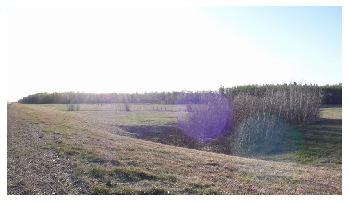

In [204]:
fig = plt.figure()
ims=[]

files = np.random.choice(validate_df['filename'][validate_df['pred']==0],10)

for i in range(10):
        img = mpimg.imread('./data/photo/'+files[i])
        im = plt.imshow(img, animated=True)
        im.axes.get_xaxis().set_visible(False)
        im.axes.get_yaxis().set_visible(False)
        im.axes.axis('off')
        ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=1000, blit=True,
                                repeat_delay=2000)

HTML(ani.to_html5_video())